In [1]:
from atomphys import _ureg, Atom
import numpy as np
import matplotlib.pyplot as plt
from math import pi as π

_ureg.default_format = '~0.3gP'
c = _ureg.c
ε_0 = _ureg.ε_0

In [2]:
# fetch the NIST transition data for Mg+
Mg = Atom('Mg+')

In [3]:
Mg('S1/2')

State(3s 2S1/2: 0 E_h)

In [4]:
# calculate the static scalar polarizability for the ground state
Mg('S1/2').α0().to('h Hz/(V/cm)^2')

0.008573000746922714 <Unit('centimeter ** 2 * hertz * planck_constant / volt ** 2')>

In [5]:
# calculate the dynamic polarizability for the ground state at 1064 nm
λ = 1064 * _ureg.nm
α0 = Mg('S1/2').scalar_polarizability(2*π*c/λ)
print('{:0.3g~P}'.format((α0/(2*c*ε_0)).to('h Hz/(W/cm^2)')))

1.73 Hz·cm²·h/W


/home/graum/atomphys/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/home/graum/atomphys/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


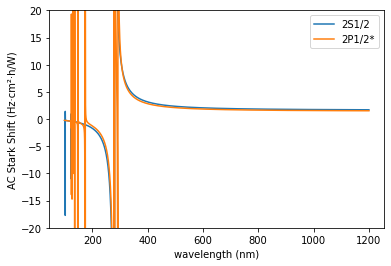

In [6]:
# make a figure of the AC stark shift 
λ = np.linspace(100,1200, 100000) * _ureg.nm

α0 = Mg('S1/2').α0(2*π*c/λ)
AC_stark0 = (α0/(2*c*ε_0)).to('h Hz/(W/cm^2)')

α1 = Mg('P1/2').α0(2*π*c/λ)
AC_stark1 = (α1/(2*c*ε_0)).to('h Hz/(W/cm^2)')

plt.plot(λ, AC_stark0, label=Mg.states[0].term)
plt.plot(λ, AC_stark1, label=Mg.states[1].term)

plt.legend()
plt.xlabel('wavelength ({:})'.format(λ.units))
plt.ylabel('AC Stark Shift ({:})'.format(AC_stark0.units))
plt.ylim(-20,20);

In [7]:
Rb = Atom('Rb')

/home/graum/atomphys/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/home/graum/atomphys/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


(-200.0, 200.0)

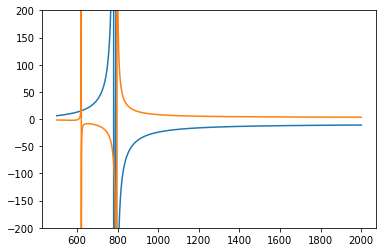

In [8]:
λ = np.linspace(500, 2000, 100000) * _ureg.nm

α0 = Rb('S1/2').α0(2*π*c/λ)
AC_stark0 = (-α0/(2*c*ε_0)*2*_ureg.W/(π*(10*_ureg.um)**2)).to('h MHz')

α0 = Rb('P1/2').α0(2*π*c/λ)
AC_stark1 = (-α0/(2*c*ε_0)*2*_ureg.W/(π*(10*_ureg.um)**2)).to('h MHz')

plt.plot(λ, AC_stark0, label=Rb('S1/2').term)
plt.plot(λ, AC_stark1, label=Rb('S1/2').term)

plt.ylim(-200, 200)

In [9]:
Rb('S1/2').to('P1/2')

Transition(5s 2S1/2 <---> 5p 2P1/2*, λ=795 nm, Γ=2π×5.745 MHz)

In [10]:
Rb('P1/2').transitions

2 Transitions (
Transition(5s 2S1/2 <---> 5p 2P1/2*, λ=795 nm, Γ=2π×5.745 MHz)
Transition(5p 2P1/2* <---> 6d 2D3/2, λ=620.8 nm, Γ=2π×0.4692 MHz))